<a href="https://colab.research.google.com/github/felipessrodrigues/machinelearning/blob/aula-05/Alura_MachineLearning_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
import pandas as pd
from datetime import datetime

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

# trecho de organizacao de codigo
# renomear colunas para padrao conhecido
colunas = {
  'price' : 'preco',
  'sold' : 'vendidos'
}
dados = dados.rename(columns=colunas)

# dicionario para criar uma coluna de visao oposta ao 'Pendentes'
oposto = {
    'yes' : 1,
    'no' : 0
}
dados.vendidos = dados.vendidos.map(oposto)

dados['km_ano'] = dados.mileage_per_year * 1.60934
dados['idade_veiculo'] = datetime.today().year - dados.model_year
dados = dados.drop(
    columns=["Unnamed: 0", "mileage_per_year", "model_year"], axis=1)

dados.head()

,preco,vendidos,km_ano,idade_veiculo
0,30941.02,1,35085.22134,24
1,40557.96,1,12622.05362,26
2,89627.50,0,11440.79806,18
3,95276.14,0,43167.32682,9
4,117384.68,1,12770.11290,10


In [3]:
# RODANDO O LINEAR PARA DIDATICA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import numpy as np

x = dados[['preco', 'km_ano', 'idade_veiculo']]
y = dados['vendidos']

# semente - base para o random
# serve para retirar aleatoriedade do treino e teste
SEED = 5
# as funcoes pegam np.random como padrao/none
np.random.seed(SEED)

# Definindo parametros de treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(
    x , y, test_size = 0.30, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" %
        (len(treino_x), len(teste_x)))

#Criando o modelo
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print("A acurácia foi de %.2f%%" % (acuracia*100))

Treinaremos com 7000 elementos e testaremos com 3000 elementos
A acurácia foi de 48.07%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [4]:
# DEFINIR ALGORITMO BASE COM DUMMY
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia = dummy.score(teste_x, teste_y)

print("A acurácia foi de %.2f%%" % (acuracia*100))

A acurácia foi de 58.00%


In [5]:
# RODANDO O SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

x = dados[['preco', 'km_ano', 'idade_veiculo']]
y = dados['vendidos']

# semente - base para o random
# serve para retirar aleatoriedade do treino e teste
SEED = 5
# as funcoes pegam np.random como padrao/none
np.random.seed(SEED)

# Definindo parametros de treino e teste
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(
    x , y, test_size = 0.30, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" %
        (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

#Criando o modelo
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print("A acurácia foi de %.2f%%" % (acuracia*100))

Treinaremos com 7000 elementos e testaremos com 3000 elementos
A acurácia foi de 76.93%


COmo o algoritmo toma decisão? É possível exibir/visualizar isso?

Treinaremos com 7000 elementos e testaremos com 3000 elementos
A acurácia foi de 76.03%


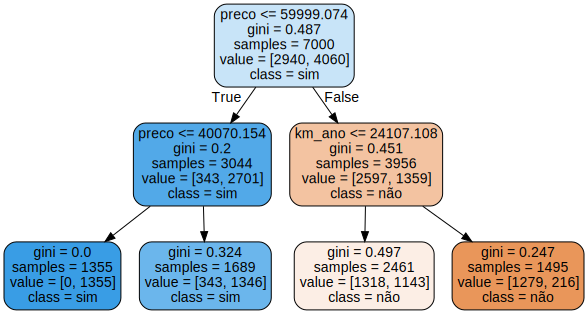

In [11]:
# ARVORES DE DECISAO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

x = dados[['preco', 'km_ano', 'idade_veiculo']]
y = dados['vendidos']

# semente - base para o random
# serve para retirar aleatoriedade do treino e teste
SEED = 5
# as funcoes pegam np.random como padrao/none
np.random.seed(SEED)

# Definindo parametros de treino e teste
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(
    x , y, test_size = 0.30, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" %
        (len(treino_x), len(teste_x)))

#Criando o modelo
modelo = DecisionTreeClassifier(max_depth=2) # utilizar essa lib
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print("A acurácia foi de %.2f%%" % (acuracia*100))

features = x.columns
dot_data = export_graphviz(
    modelo, out_file=None, filled=True, rounded=True,
    feature_names = features, class_names=["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico